# Tidyverse

The tidyverse is a set of packages that expand the core functionalities of R by making data wrangling
and visualization more friendly. 

Its main libraries are dplyer, tidyr and ggplot2.

In this notebook, we'll try some functionalities of tidyverse.

In [49]:
library(tidyverse)

### MBTI Dataset

This dataset was extracted from Kaggle, and it shows MBTI personality type along with Age, Gender, Education and Scores for personality traits.

In [ ]:
df <- read.csv('mbti_data.csv')
df[1:10,]

,Age,Gender,Education,Introversion.Score,Sensing.Score,Thinking.Score,Judging.Score,Interest,Personality
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,21,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
2,24,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
3,26,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
4,30,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
5,31,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
6,33,Female,0,1.06869,7.143507,3.84411,6.347241,Sports,ISFJ
7,32,Female,0,6.29802,6.223903,7.90633,6.705588,Arts,ESTJ
8,27,Male,1,3.98957,4.406797,5.09055,5.556500,Technology,INFP
9,30,Male,0,1.55058,6.652428,0.57707,6.919573,Unknown,ISFJ


In [51]:
df_interest <- df %>%
    group_by(Interest) %>%
    summarise(Thinking = mean(Thinking.Score), Judging=mean(Judging.Score), Sensing=mean(Sensing.Score), Introversion=mean(Introversion.Score))

df_interest

Interest,Thinking,Judging,Sensing,Introversion
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Arts,5.351749,5.369119,5.768447,4.579942
Others,5.468157,5.398094,5.780460,4.578463
Sports,5.422593,5.419587,5.795796,4.596423
Technology,5.453600,5.402925,5.748913,4.635589
Unknown,5.419282,5.382243,5.791372,4.575054


To test if the difference of thinking score means across the different interest groups is significant, we apply ANOVA to scores and interests.

This shows us how much R can be more convenient than Python.

In [69]:
for (column in c("Thinking.Score", "Judging.Score", "Sensing.Score", "Introversion.Score"))
{
  paste(column, "~Interest") %>%
    as.formula() %>%
    aov(data = df) %>%
    summary() %>%
    print()
}

               Df Sum Sq Mean Sq F value Pr(>F)
Interest        4     62  15.504   1.843  0.118
Residuals   43739 368016   8.414               
               Df Sum Sq Mean Sq F value Pr(>F)
Interest        4     12   3.044   1.463  0.211
Residuals   43739  90998   2.080               
               Df Sum Sq Mean Sq F value Pr(>F)
Interest        4     11   2.683    1.74  0.138
Residuals   43739  67427   1.542               
               Df Sum Sq Mean Sq F value Pr(>F)
Interest        4     18   4.492   0.533  0.711
Residuals   43739 368528   8.426               


### Ggplot2

Ggplot is a plotting library with a syntax derived from "The Grammar of Graphics", which makes it intuitive for plot generation.

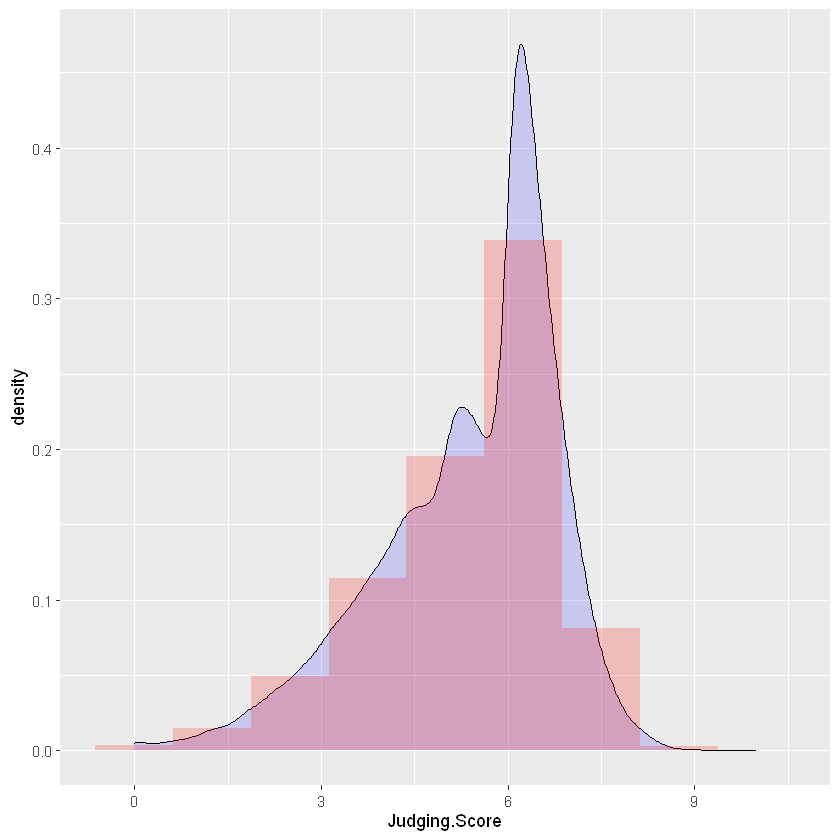

In [ ]:
df %>%
ggplot() +
aes(x=Judging.Score) +
geom_density(fill = "blue", alpha = 0.15) +
geom_histogram(aes(y=after_stat(density)), fill="red", bins=9, alpha=0.2)